## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Importing the CSV file 

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\4.linearsep.csv",header=None) 
df.head() 

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
df[2].value_counts()   

1.0    50
0.0    50
Name: 2, dtype: int64

## checking outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

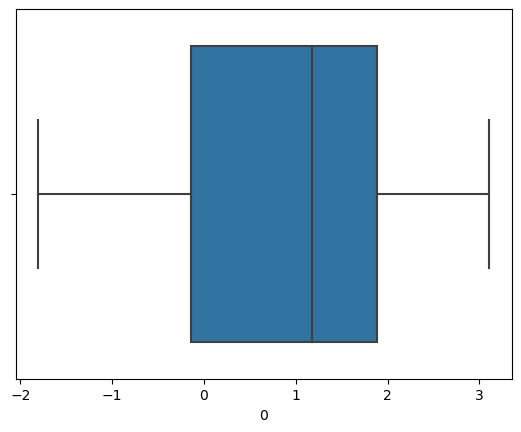

In [5]:
sns.boxplot(df[0]) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

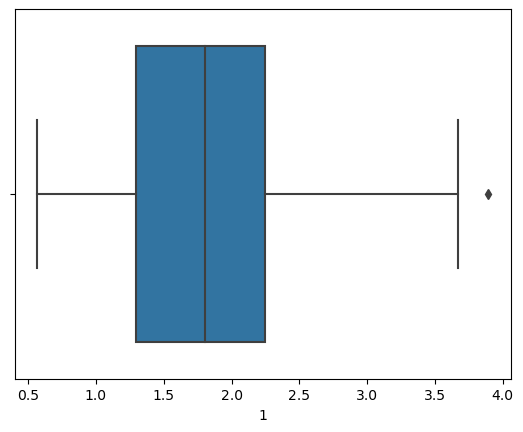

In [6]:
sns.boxplot(df[1]) 

In [7]:
## removing the outlier datapoints
df=df[df[1]<3.5] 

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
 2   2       97 non-null     float64
dtypes: float64(3)
memory usage: 3.0 KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

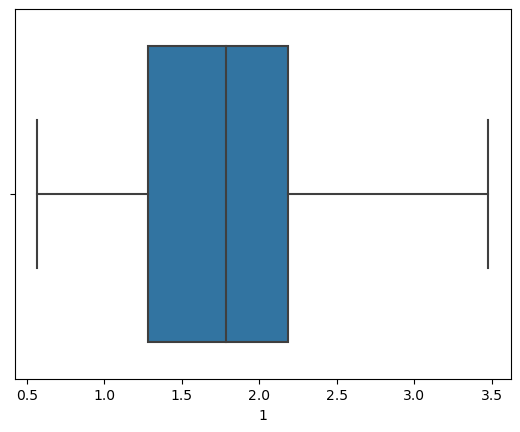

In [9]:
sns.boxplot(df[1])  

## Seperating the Input and Output Features

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)  

In [11]:
x.head() 

,0,1
0,-0.177497,0.930496
1,1.977424,1.766155
2,1.800024,1.700343
3,-0.770837,2.359163
4,-0.308009,1.594063


In [12]:
y.head()  

0    1
1    0
2    0
3    1
4    1
Name: 2, dtype: int32

## Split the data into train and test

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

In [14]:
x_train.shape  

(87, 2)

In [15]:
x_test.shape 

(10, 2)

## Standardising input features 

In [16]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure 

In [17]:
model=Sequential()
model.add(Dense(6,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid")) 

In [18]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model 

In [19]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=35,validation_split=0.1)  

Epoch 1/35
8/8 [==============================] - 1s 49ms/step - loss: 1.9241 - accuracy: 0.1538 - val_loss: 1.9726 - val_accuracy: 0.1111
Epoch 2/35
8/8 [==============================] - 0s 10ms/step - loss: 1.8254 - accuracy: 0.1667 - val_loss: 1.8636 - val_accuracy: 0.1111
Epoch 3/35
8/8 [==============================] - 0s 10ms/step - loss: 1.7331 - accuracy: 0.1667 - val_loss: 1.7612 - val_accuracy: 0.1111
Epoch 4/35
8/8 [==============================] - 0s 9ms/step - loss: 1.6459 - accuracy: 0.1667 - val_loss: 1.6662 - val_accuracy: 0.1111
Epoch 5/35
8/8 [==============================] - 0s 10ms/step - loss: 1.5657 - accuracy: 0.1795 - val_loss: 1.5783 - val_accuracy: 0.1111
Epoch 6/35
8/8 [==============================] - 0s 11ms/step - loss: 1.4909 - accuracy: 0.1923 - val_loss: 1.4962 - val_accuracy: 0.1111
Epoch 7/35
8/8 [==============================] - 0s 11ms/step - loss: 1.4219 - accuracy: 0.2051 - val_loss: 1.4209 - val_accuracy: 0.1111
Epoch 8/35
8/8 [============

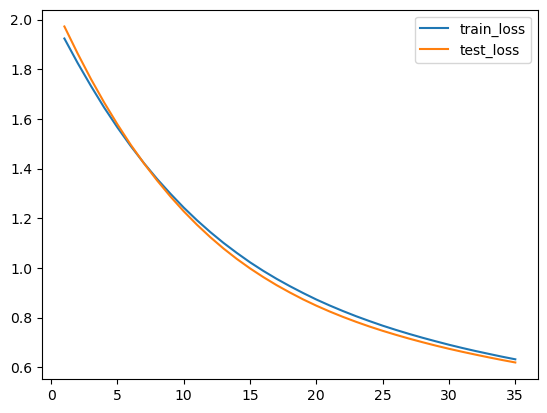

In [20]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend()  

## Predicting the model

In [21]:
predicted=model.predict(x_test) 
predicted    

1/1 [==============================] - 0s 125ms/step


array([[0.4957803 ],
       [0.56707764],
       [0.4617215 ],
       [0.49458882],
       [0.46267584],
       [0.4748835 ],
       [0.53593445],
       [0.5674019 ],
       [0.53840363],
       [0.56708825]], dtype=float32)

In [22]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

## Evaluating the model

0.9


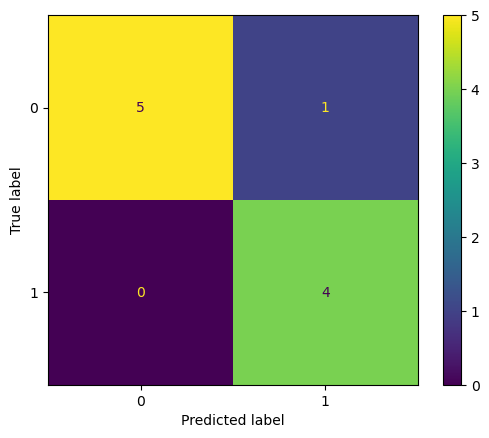

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTING THE DECISION SURFACE 

In [24]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 20s 2ms/step


<AxesSubplot:>

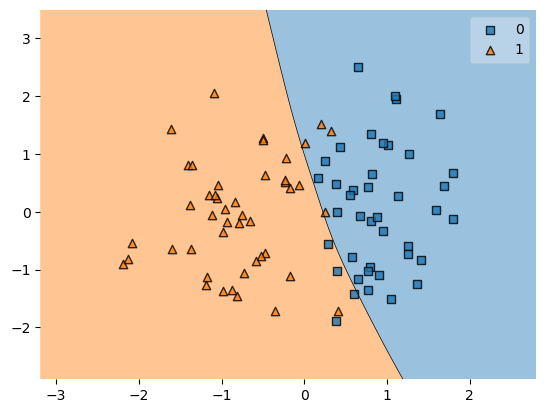

In [25]:
plot_decision_regions(x_train,y_train.values,clf=model)   

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

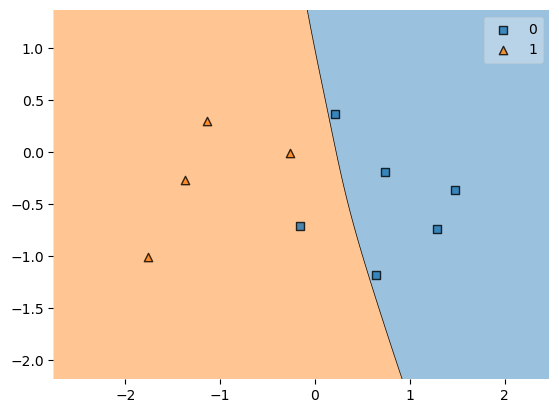

In [26]:
plot_decision_regions(x_test,y_test.values,clf=model) 

## Conclusions:

###### This model achieves an accuracy of  92%. The model architecture consists of 2 hidden layers :

- 1st HL:- 6 neurons, tanh as activation function. 
- 2nd HL:- 3 neurons, tanh asactivation function. 

###### The output layer:- sigmoid activation function.

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 35 epochs.
 